In [30]:
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")


from datetime import datetime
import time
import tweepy
import re

In [31]:
df=pd.read_csv('Tweets.csv')


In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [34]:
df.shape

(27481, 4)

In [35]:
df.info

<bound method DataFrame.info of            textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have resp

In [36]:
#convert label string to categorical
df['label_id'] = df['sentiment'].factorize()[0]
cat_id = df[['sentiment', 'label_id']].drop_duplicates().sort_values('label_id')
cat_to_id = dict(cat_id.values)
id_to_cat = dict(cat_id[['label_id', 'sentiment']].values)

#show data id_to_kategori
id_to_cat

{0: 'neutral', 1: 'negative', 2: 'positive'}

In [37]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [38]:
df.describe()

,label_id
count,27481.000000
mean,0.907718
std,0.841646
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


<AxesSubplot:xlabel='sentiment', ylabel='count'>

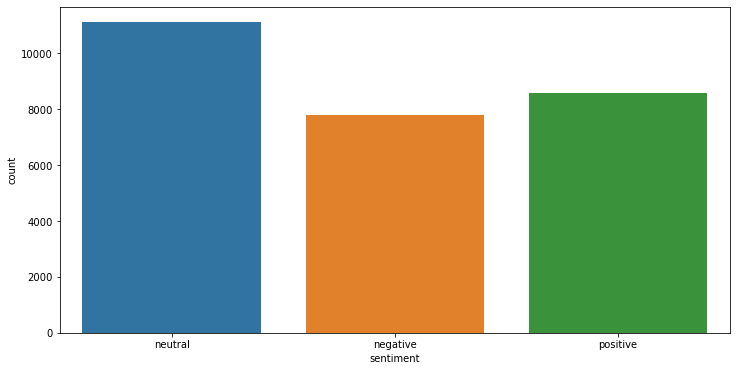

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

Separating the target variable from other variables

In [40]:
X = df.drop(columns='sentiment')


# Create y(dependent varibale)

Y=df['sentiment']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

In [42]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melodyrastegar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
def clean_text(df):
    #text = str(text)
    exclude = set(['.', ',', '?', '!'])
    df = ''.join(ch for ch in text if ch not in exclude)
    return df

In [60]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')



In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(X_train,y_train)



<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [62]:
from sklearn.linear_model import LogisticRegression


In [63]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [64]:
log_reg= LogisticRegression(multi_class="ovr", solver="newton-cg") 


In [65]:
log_reg.fit(X_train,y_train)

ValueError: could not convert string to float: '1c04467b15'